# **Linear Regression**

## **Supervised**
- #### **Classification**
- #### **Regression**
     - **Simple Linear Regression**
     - **Multiple Linear Regression**
     - **Polynomial Linear Regression**
     

### **Linear Regression**
- Linear Regression is a statistical model used to predict the relationship b/w independent and dependent variables.
    - Economic Growth, GDP Prediction
    - Product Price Prediction
    - Housing Sales, Price Prediction
    - Score Prediction, Cricket
- Examine 2 Factors :-
    - Which variable in particular are significant predictors of the outcome variables?
    - How significant is the Regression line to make predictions with highest possible accuracy.
- #### **Regression Equation**
    - y = mx + c : Line
        - y : dependent variable
        - x : independent variable
        - m : slop of the line \
          m = y2-y1/x2-x1
        - c : cofficient of the line
- Linear equation is represented as y = m*x+c \
  ### **`m = {n*sum(x*y)-(sum(x)*sum(y)} / {(n*sum(x^2)-sum(x)^2}`**
  ### **`c = {(sum(y)*sum(x^2)-(sum(x)*sum(x*y)} / {(n*sum(x^2)-sum(x)^2}`**

### **How to draw the regression line.**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

In [5]:
x = [1, 2, 3, 4, 5]
y = [2, 4, 5, 4, 5]
print("x = ", x)
print("y = ", y)

avg_x = np.mean(x)
avg_y = np.mean(y)
print("mean(x) = ", avg_x)
print("mean(y) = ", avg_y)

x2 = list(map(lambda k:k**2, x))
y2 = list(map(lambda k:k**2, y))
print("x squire : ", x2)
print("y squire : ", y2)

# x*y
xy = []
for k in range(len(x)):
    xy.append(x[k]*y[k])
    
print('x*y = ', xy)
n=len(x)
m = (n*np.sum(xy)-np.sum(x)*np.sum(y)) / (n*np.sum(x2) - np.sum(x)**2)
print('slop m = ', m)
c = ((np.sum(y)*np.sum(x2)) - (np.sum(x)*np.sum(xy))) / ((n*np.sum(x2))-(np.sum(x)**2))
print('cofficent c = ', c)

# Y = m*X + c
X = [0, 1, 2, 3, 4, 5]
Y = list(map(lambda k:m*k+c, X))
print(X, Y)

x =  [1, 2, 3, 4, 5]
y =  [2, 4, 5, 4, 5]
mean(x) =  3.0
mean(y) =  4.0
x squire :  [1, 4, 9, 16, 25]
y squire :  [4, 16, 25, 16, 25]
x*y =  [2, 8, 15, 16, 25]
slop m =  0.6
cofficent c =  2.2
[0, 1, 2, 3, 4, 5] [2.2, 2.8000000000000003, 3.4000000000000004, 4.0, 4.6, 5.2]


- using the above m and c formula calculating the slop and cofficient for best fit line
- m=0.6 and c=2.2
- Xm=3.0, Ym=4.0
- equation of best fit line Ym = m\*Xm + c
- calculate the **error (e)** and **error squire (e^2)**
- **e = (y-Ypred)**
- **e^2 = (y-Ypred)^2**

- Sum of Squired Error = sum(e^2)
- **Minimizing the Distance :**
    - There are lots of ways to minimize the distance b/w the line and the data points like `Sum of Squired Errors`, `Sum of Absolute Errors`, `Root Mean Squire Error`

### **Multiple Linear Regression**
- Simple Linear Regression : y=mx+c
- Multiple Linear Regression :
    - Y = m1\*x1 + m2\*x2 + m3\*x3 + ........... + mn\*xn + c
        - Where Y:Dependent Variable(DV)
        - m1, m2, m3, ......, mn : slops
        - c : cofficient

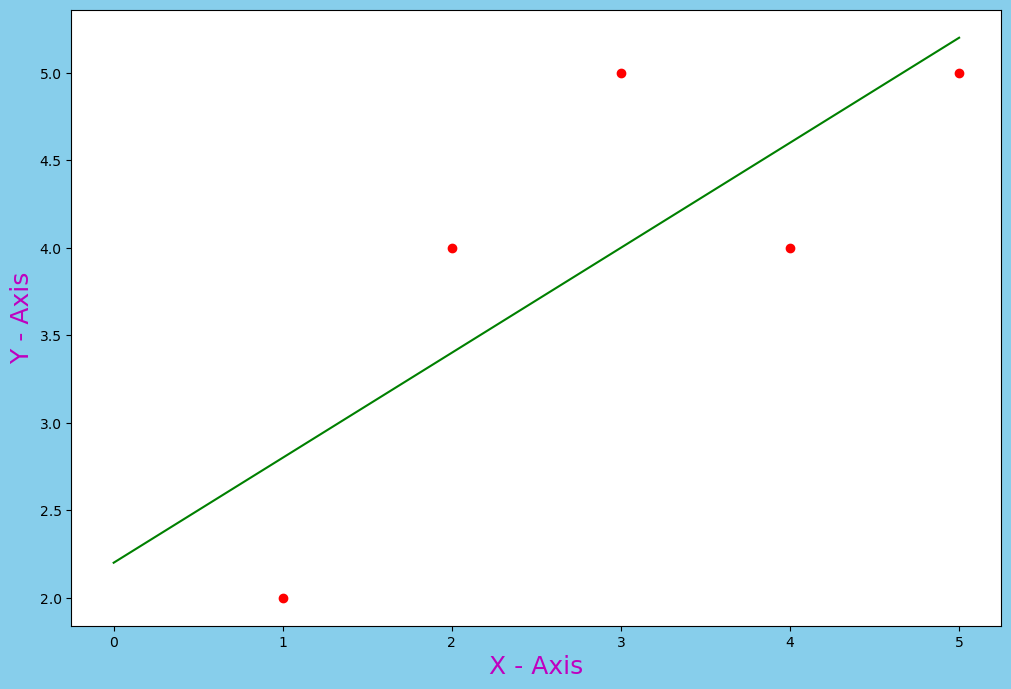

In [6]:
plt.figure(1, figsize=(12, 8), facecolor='skyblue')
plt.scatter(x, y, color='r')
plt.plot(X, Y, color='g')
plt.xlabel("X - Axis", color='m', size=18)
plt.ylabel("Y - Axis", color='m', size=18)
plt.show()

In [7]:
# Importing the dataset
companies = pd.read_csv("../data/MLAlgorithmData/1000_Companies.csv")
companies.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
995,54135.00,118451.999,173232.6695,California,95279.96251
996,134970.00,130390.080,329204.0228,California,164336.60550
997,100275.47,241926.310,227142.8200,California,413956.48000
998,128456.23,321652.140,281692.3200,California,333962.19000
999,161181.72,270939.860,295442.1700,New York,476485.43000


In [8]:
# check null values
companies.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,81668.927200,122963.897612,226205.058419,119546.164656
std,46537.567891,12613.927535,91578.393542,42888.633848
min,0.000000,51283.140000,0.000000,14681.400000
25%,43084.500000,116640.684850,150969.584600,85943.198543
50%,79936.000000,122421.612150,224517.887350,117641.466300
75%,124565.500000,129139.118000,308189.808525,155577.107425
max,165349.200000,321652.140000,471784.100000,476485.430000


In [9]:
companies.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [10]:
companies.isnull().values.any()

False

In [11]:
# Extracting the Independent and Dependent Variable
X = companies.iloc[:, :-1] # Attributes
Y = companies.iloc[:, -1] # Labels

- **We need to predict the profit**

In [12]:
X.tail()

,R&D Spend,Administration,Marketing Spend,State
995,54135.00,118451.999,173232.6695,California
996,134970.00,130390.080,329204.0228,California
997,100275.47,241926.310,227142.8200,California
998,128456.23,321652.140,281692.3200,California
999,161181.72,270939.860,295442.1700,New York


In [13]:
Y.tail()

995     95279.96251
996    164336.60550
997    413956.48000
998    333962.19000
999    476485.43000
Name: Profit, dtype: float64

/tmp/ipykernel_9776/268269702.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(companies.corr(), square=True)


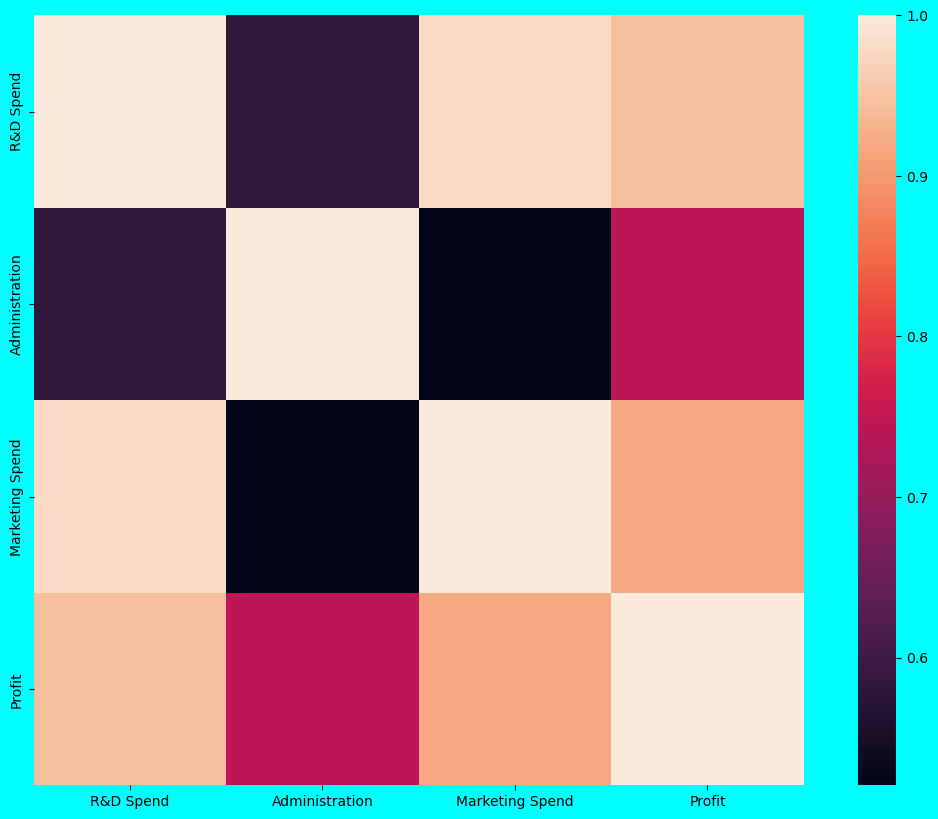

In [14]:
# Data visualization
# Building the Correlation matrix
plt.figure(1, figsize=(14, 10), facecolor='aqua')
sns.heatmap(companies.corr(), square=True)
plt.show()

- **LabelEncoder() :**
    The **LabelEncoder** class from the **sklearn.preprocessing** module in **scikit-learn** is used to convert categorical labels into `numerical representations`. 
    It is a commonly used preprocessing step in machine learning tasks, especially when dealing with categorical variables or target labels that are not in a 
    numerical format.

- **OneHotEncoder() :**
    The **OneHotEncoder** class from the **sklearn.preprocessing** module in **scikit-learn** is used to convert categorical features into a `binary one-hot encoded representation`.
    It is commonly used when dealing with categorical variables or features that have multiple categories or levels.

In [15]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

In [16]:
# Encoding categorical data
# LabelEncoder()
le = LabelEncoder() # creating an object of LabelEncoder() class
X.iloc[:, 3] = le.fit_transform(X.iloc[:, 3]) # calling the method of LabelEncoder() class
X

/tmp/ipykernel_9776/630108773.py:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X.iloc[:, 3] = le.fit_transform(X.iloc[:, 3]) # calling the method of LabelEncoder() class


,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.800,471784.1000,2
1,162597.70,151377.590,443898.5300,0
2,153441.51,101145.550,407934.5400,1
3,144372.41,118671.850,383199.6200,2
4,142107.34,91391.770,366168.4200,1
...,...,...,...,...
995,54135.00,118451.999,173232.6695,0
996,134970.00,130390.080,329204.0228,0
997,100275.47,241926.310,227142.8200,0
998,128456.23,321652.140,281692.3200,0


In [17]:
# OneHotEncoder
ohe = OneHotEncoder() # creating the object of OneHotEncoder
column_to_encode = X.iloc[:, 3:4]
encoded_column = ohe.fit_transform(column_to_encode).toarray()
print(encoded_column.shape)
encoded_column


(1000, 3)


array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

- **random_state=42 :**
    - In the given code snippet, random_state=42 is used as an argument in the train_test_split function. The random_state parameter is an optional parameter that allows you to control the random shuffling and splitting of the data.

    - By setting random_state to a specific value, such as 42 in this case, you ensure reproducibility in the random splitting of the data. When you use the same random_state value in subsequent runs, you will obtain the same train-test split. This is useful for making the code's behavior predictable and reproducible, especially during development and debugging.

    - It's important to note that the specific value of random_state doesn't matter as long as it's the same across runs. Different values of random_state will result in different random splits of the data.

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [19]:
X_train.shape, X_test.shape

((800, 4), (200, 4))

In [20]:
oneHE = OneHotEncoder()
oneHE.fit(X_train)
X_train_ohe = oneHE.transform(X_train).toarray()
X_train_ohe

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [21]:
ohe_df = pd.DataFrame(X_train_ohe, columns=oneHE.get_feature_names_out(X_train.columns))
ohe_df.shape

(800, 2394)

In [22]:
ohe_df.tail()

,R&D Spend_0.0,R&D Spend_542.05,R&D Spend_1000.23,R&D Spend_1269.0,R&D Spend_1315.46,R&D Spend_1634.0,R&D Spend_1681.0,R&D Spend_2296.0,R&D Spend_2307.0,R&D Spend_2603.0,...,Marketing Spend_376029.195,Marketing Spend_376669.7899,Marketing Spend_377009.3824,Marketing Spend_383199.62,Marketing Spend_407934.54,Marketing Spend_443898.53,Marketing Spend_471784.1,State_0,State_1,State_2
795,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
796,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
797,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
798,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
799,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [28]:
X_train_ohe = X_train_ohe.pd_DataFrame(X_train_ohe)
X_train_ohe

AttributeError: 'numpy.ndarray' object has no attribute 'pd_DataFrame'

In [24]:
X_train

,R&D Spend,Administration,Marketing Spend,State
29,65605.48,153032.0600,107138.38000,2
535,12068.00,112239.3528,92064.27813,0
695,133587.00,130185.8323,326535.52050,0
557,83794.00,122832.1752,230459.79100,0
836,141217.00,131312.6654,341257.62630,2
...,...,...,...,...
106,151853.00,132883.4384,361779.81740,0
270,141804.00,131399.3563,342390.24440,2
860,154595.00,133288.3894,367070.51390,2
435,21297.00,113602.3336,109871.65880,2


In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
model = LinearRegression()
model.fit(X_train_ohe, Y_train)
X_test_ohe = oneHE.transform(X_test)
Y_preds = model.predict(X_test_ohe)
Y_preds

ValueError: Found unknown categories [1215.0, 2638.0, 4187.0, 4908.0, 5954.0, 6101.0, 6166.0, 6952.0, 9063.0, 9316.0, 9405.0, 10372.0, 13269.0, 14469.0, 15801.0, 16708.0, 17219.0, 17495.0, 18903.0, 18930.0, 18947.0, 18989.0, 19242.0, 20279.0, 21890.0, 22177.74, 22961.0, 22986.0, 24538.0, 26554.0, 28731.0, 29050.0, 29287.0, 29605.0, 30713.0, 30744.0, 30917.0, 32137.0, 33021.0, 33472.0, 33718.0, 34269.0, 34384.0, 36008.0, 37255.0, 38099.0, 38385.0, 38558.51, 39157.0, 42770.0, 43532.0, 45209.0, 46177.0, 46373.0, 46445.0, 47438.0, 47724.0, 49288.0, 49407.0, 49559.0, 49642.0, 49855.0, 50112.0, 52714.0, 52746.0, 53981.0, 54112.0, 54135.0, 55907.0, 58265.0, 58814.0, 58848.0, 58867.0, 59551.0, 60311.0, 60472.0, 60822.0, 60955.0, 61613.0, 61994.48, 63615.0, 63645.0, 64233.0, 64529.0, 64664.71, 65307.0, 65509.0, 65694.0, 65903.0, 66766.0, 67532.53, 67697.0, 68679.0, 68920.0, 70529.0, 70972.0, 72838.0, 73771.0, 74741.0, 75431.0, 76026.0, 78694.0, 78709.0, 79611.0, 80380.0, 80546.0, 80883.0, 81041.0, 83026.0, 83936.0, 84406.0, 84817.0, 85315.0, 87536.0, 88069.0, 89242.0, 90441.0, 91086.0, 91258.0, 92114.0, 92507.0, 94169.0, 95482.0, 96720.0, 99603.0, 100306.0, 100405.0, 101322.0, 101913.08, 104168.0, 104391.0, 104830.0, 105331.0, 106384.0, 107178.0, 107612.0, 107707.0, 107739.0, 107864.0, 108056.0, 112043.0, 113478.0, 114589.0, 116989.0, 118793.0, 120402.0, 121583.0, 122931.0, 124648.0, 124967.0, 127949.0, 128157.0, 128338.0, 128456.23, 129013.0, 130650.0, 131074.0, 131981.0, 132449.0, 133094.0, 133956.0, 134194.0, 134440.0, 135016.0, 135489.0, 135886.0, 136367.0, 137618.0, 137713.0, 137973.0, 138546.0, 139181.0, 139429.0, 140062.0, 140627.0, 141090.0, 141092.0, 141203.0, 142143.0, 142634.0, 144520.0, 144661.0, 145038.0, 145513.0, 146162.0, 146580.0, 146775.0, 147448.0, 149026.0, 150342.0, 150633.0, 151611.0, 152746.0, 154106.0, 154222.0, 155563.0, 155584.0, 158727.0, 159134.0, 159477.0] in column 0 during transform

In [27]:
X_train_ohe

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.]])